<a href="https://colab.research.google.com/github/CShorten/CORD-19-Mining/blob/main/Tokenization_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Illustration of Tokenization Functions in the Tokenization.py file </h2>

Needs to be dramatically improved, only uploading this for my own organization.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!unzip Pdf_Json_1_DataFrame.csv.zip

In [209]:
import pandas as pd
df = pd.read_csv('Pdf_Json_1_DataFrame.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397541 entries, 0 to 397540
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sequence  397541 non-null  object
 1   Label     397541 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [210]:
import nltk
nltk.download('punkt');

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [211]:
from nltk.tokenize import word_tokenize
text = "Exploring the CORD19 Dataset for Evidence Retrieval"
print(word_tokenize(text))

['Exploring', 'the', 'CORD19', 'Dataset', 'for', 'Evidence', 'Retrieval']


In [212]:
%%time
word_tokenize(text);

CPU times: user 213 µs, sys: 2 µs, total: 215 µs
Wall time: 235 µs


['Exploring', 'the', 'CORD19', 'Dataset', 'for', 'Evidence', 'Retrieval']

In [213]:
Index_Token_Dict = {}
# 
new_index_lists = []

<h2> Building the Token -> Index Dictionary </h2>

Strategy #1: Top-K most frequent tokens

Damn this took forever...

In [214]:
%%time
freq_counter = {}
for i in df.Sequence:
  tok_seq = word_tokenize(i)
  for tok in tok_seq:
    if tok in freq_counter.keys():
      freq_counter[tok] += 1
    else:
      freq_counter[tok] = 1

CPU times: user 4min 56s, sys: 343 ms, total: 4min 57s
Wall time: 4min 57s


Sort the Dictionary

In [215]:
import operator
sorted_dict = sorted(freq_counter.items(), key=operator.itemgetter(1))
# credit: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [216]:
len(sorted_dict)

656159

In [217]:
sorted_dict[-10:]

[('a', 480304),
 (')', 653999),
 ('(', 657404),
 ('to', 665771),
 ('in', 687995),
 ('and', 986574),
 ('of', 1186172),
 ('.', 1380894),
 ('the', 1567251),
 (',', 1867586)]

In [218]:
sorted_dict[-1][0]

','

In [219]:
# use index 30k for UNK token
top_K_list = sorted_dict[-29_999:]

In [220]:
frequency_counters = []
for i in range(len(top_K_list)):
  frequency_counters.append(top_K_list[i][1])

In [221]:
sample = frequency_counters[-50:]

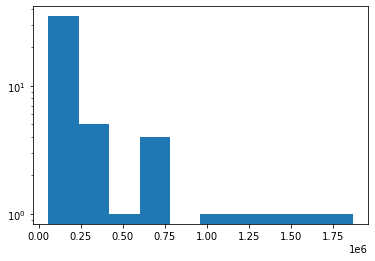

In [222]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.hist(sample, bins=10);
plt.yscale("log");

In [223]:
top_K_token_index_dict = {}
top_K_index_token_dict = {}
counter = 1

for i in range(len(top_K_list)):
  top_K_token_index_dict[top_K_list[i][0]] = counter
  top_K_index_token_dict[counter] = top_K_list[i][0]
  counter += 1

top_K_index_token_dict[30_000] = "Unknown"

In [224]:
def text_to_index(seq, token_index_dict):
  idx_lst = []
  tok_lst = word_tokenize(seq)
  for tok in tok_lst:
    if tok not in token_index_dict.keys():
      idx_lst.append(30_000)
    else:
      idx_lst.append(token_index_dict[tok])
  return idx_lst

In [225]:
sentence = "hello how are you doing"
text_to_index(sentence, top_K_token_index_dict)

[30000, 29675, 29978, 29143, 25834]

In [226]:
top_K_token_index_dict.keys()

dict_keys(['inositol', 'Proteintech', 'stillbirth', 'colder', 'EBV-associated', 'self-renewal', 'isotopes', 'Randomization', 'unblinded', 'LQTS', '590', 'computable', 'IEEE', 'IKKβ', 'veterans', 'topographic', 'impediment', 'obviate', 'adapts', 'panning', 'IRESs', 'maternally', 'Acquisition', 'hardness', 'feather', 'non-respiratory', 'cross-protective', 'jour', 'signes', 'Esto', 'poder', '2022', 'Planned', 'up-regulate', 'publicized', 'cloud-based', 'Informatics', 'RQ1', 'clear-cut', 'chemoattractants', 'CRSwNP', 'clonidine', 'Urea', 'SR-rich', '2-14', '462', '34.8', '17.7', 'Hooper', '1+', 'XX', 'Exploratory', 'Xeon', 'VIF', 'pleuropneumoniae', 'tetrazolium', 'mantle', 'five-fold', 'co-factors', 'salbutamol', '88.9', 'adsorbent', 'Graphical', 'journeys', '595', 'undiscovered', 'Naples', 'dashboards', 'resourced', 'Interferons', 'anaphylactic', 'intensivos', 'aún', 'Sinne', 'Reaktion', 'SAB', 'Substanzen', 'Reduktion', 'jeder', 'Störungen', 'verabreicht', 'Gesundheit', 'Über', '549', '

In [227]:
freq_counter['how']

11811

In [228]:
def index_to_text(idx_list, index_token_dict):
  word = ""
  for idx in idx_list:
    word += index_token_dict[idx]
    word += " "
  return word

In [229]:
index_to_text([30_000, 29_675, 29_978, 29_143, 25_834], top_K_index_token_dict)

'Unknown how are you doing '

# Refactoring into Python file (ignore)

In [230]:
# If needed to re-upload code from Github without restarting session
# import shutil
# shutil.rmtree('/path/to/your/dir/')

!git clone https://github.com/CShorten/CORD-19-Mining.git

fatal: destination path 'CORD-19-Mining' already exists and is not an empty directory.


In [231]:
import sys, os  
sys.path.append(os.getcwd() + '/CORD-19-Mining/')


from tokenization import build_topK_Dicts, text_to_index, index_to_text

In [232]:
text_index_dict, index_text_dict = build_topK_Dicts(df, "Sequence")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [233]:
text_index_dict["how"]

1

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397541 entries, 0 to 397540
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sequence  397541 non-null  object
 1   Label     397541 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


# Back to Business

In [235]:
def build_index_lists(df, text_col_name, text_index_dict):
  index_lists = []
  for seq in df[text_col_name]:
    seq = seq.split(' ')
    new_index_list = []
    for tok in seq:
      if tok in text_index_dict.keys():
        new_index_list.append(text_index_dict[tok])
      else:
        new_index_list.append(30_000)
    index_lists.append(new_index_list)
  return index_lists

In [236]:
index_lists = build_index_lists(df, "Sequence", top_K_token_index_dict)

In [237]:
df.Sequence[0]

'a1111111111 a1111111111 a1111111111 a1111111111 a1111111111 available data; 78%). In addition, significant increases in the levels of lactate dehydrogenase and α-hydroxybutyrate dehydrogenase were detected in 28 patients (among 34 patients with available data; 82%) and 25 patients (among 34 patients with available data; 74%), respectively. Patchy lesions in lobules were detected by chest computed tomographic scans in 28 patients (82%). Ground-glass opacities, which were a typical feature in adults, were rare in pediatric patients (3%). Rapid radiologic progression and a late-onset pattern of lesions in the lobules were also noticed. Lesions in lobules still existed in 24 (among 32 patients with lesions; 75%) patients that were discharged, although the main symptoms disappeared a few days after treatment. All patients were discharged, and the median duration of hospitalization was 10.00 '

In [238]:
index_to_text([29990], top_K_index_token_dict)

'a '

In [239]:
try:
  top_K_index_token_dict["data"]
except:
  print("Wow, data is not in the topK, this needs to be cleaned better")

Wow, data is not in the topK, this needs to be cleaned better


In [ ]:
index_lists[0][:20]

In [241]:
lst = [1,2,3,4,5,6]
lst.pop()
print(lst)

[1, 2, 3, 4, 5]


In [242]:
def pad_to_length_k(org_index_lists, k):
  index_lists = org_index_lists
  for seq_list in index_lists:
    while (len(seq_list) > k):
      seq_list.pop()
    while (len(seq_list) < k):
      seq_list.append(0)
  return index_lists

In [243]:
index_lists = pad_to_length_k(index_lists, 128)

In [244]:
df["Index_Lists"] = index_lists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397541 entries, 0 to 397540
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Sequence     397541 non-null  object
 1   Label        397541 non-null  int64 
 2   Index_Lists  397541 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.1+ MB
